optimized a step.
optimized a step.
optimized a step.


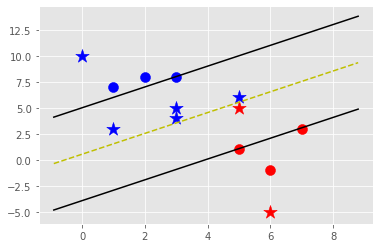

In [13]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

class support_vector_machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1: 'r', -1: 'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    
    # train
    def fit(self, data):
        self.data = data
        
        # { ||w||: [w,b] }
        # here we are trying to find the minimum magnitude 
        opt_dict = {}
        
        # transformations for w
        transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
        
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
                    
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        
        # support vectors yi(xi.w + b) = 1
        
        step_sizes = [self.max_feature_value * 0.1, 
                      self.max_feature_value * 0.01, 
                      self.max_feature_value * 0.001]
        
        # extremely expensive
        b_range_multiple = 5
        
        # we don't need to take as small of steps with b as we do w
        b_multiple = 5
        
        latest_optimum = self.max_feature_value * 10
        
        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                  self.max_feature_value*b_range_multiple,
                                  step*b_multiple):
                    for transformation in transforms:
                        w_t = w * transformation
                        found_option = True
                        
                        # weakest link in the SVM fundamentally => we need to store all the 
                        # data in memory
                        # SMP attempts to fix this a bit
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                # yi(xi . w + b) >= 1
                                if not yi*(np.dot(w_t,xi) + b) >= 1:
                                    found_option = False
                                    # print(xi, ':', yi*(np.dot(w_t,xi) + b) >= 1)
                                    
                        if found_option:
                            # linalg_norm == magnitude of the vector
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]
                            
                if w[0] < 0:
                    optimized = True
                    print('optimized a step.')
                else:
                    # w = [5,5]
                    # step = 1
                    # w - step = [4,4]
                    w = w - step

            norms = sorted([n for n in opt_dict])
            # ||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0] + step*2
        
    
    def predict(self, features):
        # sign(x . w + b)
        classification = np.sign(np.dot(np.array(features), self.w) + self.b)
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0], 
                            features[1], 
                            s=200, 
                            marker='*', 
                            c=self.colors[classification])
        
        return classification
    
    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) 
          for x in data_dict[i]] for i in data_dict]

        # hyperplace = x.w + b
        # v = x.w + b
        # psv = 1 (positive support vector)
        # nsp = -1 (negative support vector)
        # dec = 0 (decission boundry)
        def hyperplace(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]
        
        datarange = (self.min_feature_value*0.9, self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        # (x.w +b) = 1
        # positive support vector hyperplane
        psv1 = hyperplace(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplace(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2], 'k')
        
        # (x.w +b) = -1
        # positive support vector hyperplane
        nsv1 = hyperplace(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplace(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2], 'k')
        
        # (x.w +b) = 0
        # positive support vector hyperplane
        db1 = hyperplace(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplace(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min, hyp_x_max], [db1, db2], 'y--')
        
        plt.show()

data_dict = {
    -1: np.array([[1,7], [2,8], [3,8]]),
    1: np.array([[5,1],[6,-1],[7,3]])
}

svm = support_vector_machine()
svm.fit(data=data_dict)

predict_us = [[0,10],[1,3],[3,4],[3,5],[5,5],[5,6],[6,-5]]
for p in predict_us:
    svm.predict(p)

svm.visualize()

In [14]:
svm.predict([5,6])

-1.0